In [1]:
import torch
import pandas as pd
import os

import Utils.PTModel.Training as Training
import Utils.Data.DataLoading as DataLoading
import Utils.EvaluationMetrics.TSNEVisual as TSNEVisual
import Utils.PTModel.Inference as Inference

import Utils.PTModel.Models as Models

MODELNAME = "TestName"

In [2]:
# Loading standard train test split
TrainingData = DataLoading.LoadTrainTestData("../data/tomData/unshuffled3x3tiles.csv", shuffle=True)

TFIDF Weight Array: tensor([4847.0957, 1843.4519, 6202.6182, 5114.1582, 6885.7148, 5351.0005,
        4931.2700, 2549.7324, 1582.4102, 2132.1248, 2679.5310, 6467.0049,
        4044.3000])


In [3]:
model = Training.TrainModel(TrainingData, 1, 32, Models.TileEmbeddingVAE)

/home/surfytom/Projects/Dissertation/Repos/TileEmbeddingDissertation/srcTom/Utils/PTModel/Training.py:48: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  xTextbatch = torch.tensor(trainData.iloc[j:j+batchSize]["encodedAffordances"].tolist(), dtype=torch.float32).to(device)


Epoch 0: loss 6466.733104428008


In [17]:
if os.path.isdir(f"Models/{MODELNAME}"):
    raise RuntimeError(f"Folder for model {MODELNAME} already exists. Delete the folder and retry or change the model name.")

os.mkdir(f"Models/{MODELNAME}")
torch.save(model, f"Models//{MODELNAME}/{MODELNAME}.pt")

RuntimeError: Folder for model TestName already exists. Delete the folder and retry or change the model name.

In [18]:
Inference.SaveUnifiedRepresentation(model, pd.concat([TrainingData["trainData"], TrainingData["testData"]]), MODELNAME)

RuntimeError: Folder Models/TestName/UnifiedRep already exists. Delete the folder and retry.

In [2]:
data, fitEmbeddings = TSNEVisual.TrainTSNEModel(MODELNAME)

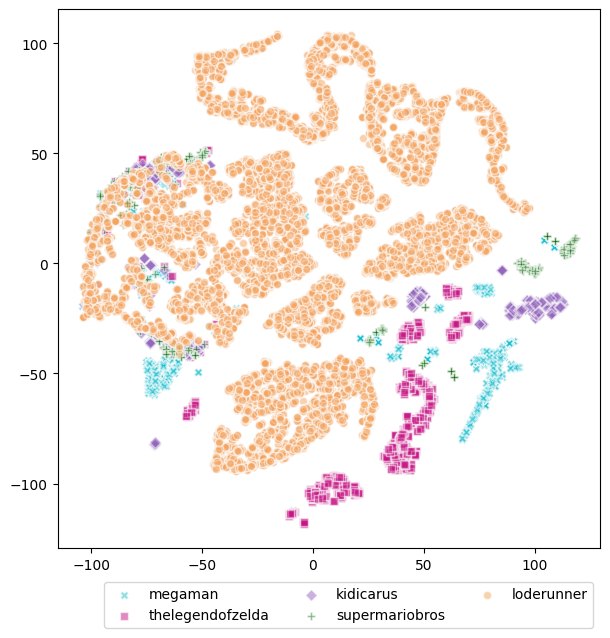

In [18]:
TSNEVisual.DisplayTSNEEmbeddings(data, fitEmbeddings, modelName=MODELNAME, save=True)